# Chapter 4: Word Embeddings

Language, in its essence, is a beautiful collection of words coming together to communicate thoughts, emotions, and facts. But how do we translate that intricacy into a format that machines can understand? Let's embark on a journey to explore the numerical representation of words.

In this section, we will understand why representing words numerically is crucial for machine learning models. The beauty of language lies in its diversity and depth. However,computers understand **numbers, not words**. Now, the question is:



* How can we bridge this gap between human language and machine processing? 

* How then do we get a computer to understand the sentiment behind a statement like

**`"The sunset at the Maasai Mara is breathtaking!"?`**

The answer lies in word representation.

**Learning Objectives:**

* Feature Extraction from Text Data
* OneHot Encoder, LabelEncoder
* WordVec library

## Why is Numerical Representation Essential?

Before diving into the complexities of numerical word representation, let's discuss why it's necessary.


In [2]:
# Consider the following Swahili sentence:
sentence = "Hakuna Matata! Ni lugha ya Kiswahili."



# Now, let's transform this sentence into a format that's inherently numerical: binary.
binary_representation = [bin(ord(char)) for char in sentence]



# Here's the binary representation of the first few characters of our sentence:
binary_representation[:10]


['0b1001000',
 '0b1100001',
 '0b1101011',
 '0b1110101',
 '0b1101110',
 '0b1100001',
 '0b100000',
 '0b1001101',
 '0b1100001',
 '0b1110100']

From the output above, we've successfully transformed our `Swahili` text into a binary format. While this demonstrates that any text can be turned into numbers, it's merely a direct translation of characters to their binary values. 

This doesn't help machines "understand" the sentiment or context behind `"Hakuna Matata"`, not even to mention `Ni lugha ya Kiswahili.` The question now is, how can we represent words such that their meaning, context, and nuances are taken into account? This is where the world of **word representation** comes handy.


## Navigating the Challenges of Textual Data

Representing words numerically isn't straightforward. Let's outline the challenges we need to navigate:

### 1. **Variability**:

Words are chameleons, changing meanings based on context.  For example:


* **"Current:"**
    +  `The current flowed through the wire`is pointing to the flow of electricity.
    
    + `The river's current was strong,` indicating the flow or direction of water.
    
    
    
* **"Light:"** 
    + `The box was very light`" meaning it's not heavy.
    + `The room was filled with bright light` is pointing to the brightness or luminescence.

    
* **"Leaves:"**
    + `The leaves turned orange in autumn` highlights the parts of plants or trees.
    + `She leaves for her trip tomorrow` meaning she departs.

### 2. **Volume**: 

The lexicon of languages is vast and varied. For example:

   + Kiswahili uses `"namba"` for `"number"`, which is reminiscent of `"number"` in English and `"numéro"` in French.
   
   
   + The word `"sifuri"` means `zero` in Kiswahili, showing influence from Arabic's `"sifr"`.
   
   
   + The Kiswahili word for `"book"` is `"kitabu"`, which shares roots with the Arabic word `"kitab"`.
   
   
   + `"Bendera"`, the word for `"flag"` in Kiswahili, can be traced back to the Portuguese word `"bandeira"`.

### 3. **Structure**: 

Unlike neat columns of numbers, text is messy. Sentences can be short or span multiple lines, and the order of words can flip the meaning entirely.

+ **Sentence Length:** 
    - `Short:` "She wept."
    - `Long:` "With a heavy heart, gazing out at the pouring rain, she wept silently, thinking of all the memories they had shared."



+ **Word Order:**

    - `Original:` "Dogs chase cats."
    - `Flipped:` "Cats chase dogs."



+ **Modifiers and Clarity:**

    - `Ambiguous:` "I saw the man with the telescope."
    - `Clear Structures:`
    
        + "Using my telescope, I saw the man."
        + "I saw the man who had a telescope."

### 4. **Nuances**: 

The subtleties in language, like tone, dialects, or cultural references, can be profound. A simple greeting can be factual or dripping in sarcasm, depending on the tone.
    
* **Dialects:**

    * Statement: `"I want to buy maize."`
        - English in Kenya: "I want to buy maize."
        - English in Nigeria: "I want to buy corn.

* **Cultural References:**

    * Statement: `"He is the Kipchoge of business."`
        - For those familiar with Eliud Kipchoge, the Kenyan long-distance runner, this implies excellence in business.
        - Someone unfamiliar with Kipchoge might miss the significance.
* **Euphemisms:**

    * Statement: `"He has joined the ancestors."`
        - This is an African way of saying `"He has passed on or died."`

## Basic Word Representations:


Before the rise of advanced word embedding techniques, one of the primary ways to represent words numerically was through one-hot encoding. It's a simple, yet effective method, especially when dealing with a limited vocabulary.
Here below, we will explore some of its nuances.


### One-hot Encoding

At a high level, one-hot encoding turns categorical variables into a binary matrix. Think of it as having a unique switch for every word in a vocabulary. A particular word's switch is turned on (set to 1), while the rest remain off (set to 0).

Here, we'll consider some iconic African animals to illustrate the concept.

In [3]:
# Initializing our sample dataset

animals = ["lion", "elephant", "giraffe", "cheetah", "hippo"]


Now, let's attempt to represent the animal `'lion'` using one-hot encoding. For the `"lion"`, its designated switch will be turned on, and all others will be off.

In [4]:
encoding = {animal: [1 if animal == target else 0 for target in animals] for animal in animals}

encoding

{'lion': [1, 0, 0, 0, 0],
 'elephant': [0, 1, 0, 0, 0],
 'giraffe': [0, 0, 1, 0, 0],
 'cheetah': [0, 0, 0, 1, 0],
 'hippo': [0, 0, 0, 0, 1]}

In [5]:
encoding["lion"]

[1, 0, 0, 0, 0]

In [6]:
encoding["elephant"]

[0, 1, 0, 0, 0]

In [7]:
encoding["cheetah"]

[0, 0, 0, 1, 0]

>#### <font color=#800080>Q:</font> <a class="anchor" id="Task-1"></a>

* What could be the shortcomings of One-hot encoder?

###  LabelEncoder

The `LabelEncoder` provides a simple way to convert categorical labels into a range of `[0, n_classes - 1]`. Let's see it in action with an example.

In [11]:
from sklearn.preprocessing import LabelEncoder


animals = ['eagle', 'ant', 'giraffe', 'eagle', 'giraffe']


animals_labels  = LabelEncoder().fit_transform(animals)


animals_labels

array([1, 0, 2, 1, 2])

Here, we've transformed our list of animals into numerical labels. Each unique animal is assigned a unique number. It's a straightforward mapping but has its limitations when used directly in certain machine learning models.


### OneHotEncoder:

While `LabelEncoder` gives a single number for each category, `OneHotEncoder` represents each category as a binary vector. This is particularly useful for algorithms that might misunderstand numerical closeness as a form of similarity.


In [13]:
from sklearn.preprocessing import OneHotEncoder 

# Reshape animal_labels to be a 2D array, necessary for OneHotEncoder
animal_labels_reshaped = animals_labels.reshape(-1, 1)

# Using OneHotEncoder
onehotencoder = OneHotEncoder()
animal_onehot = onehotencoder.fit_transform(animal_labels_reshaped).toarray()

animal_onehot


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Bag of words

Bag of words is a very popular model for feature extraction from text data. It is the process of converting the text data into term vectors. Term vectors are algebraic models used to convert the text into numbers. The vector for a document $D$ can be mathematically represented as:

$$D_{vs} =  \{ W_{D1} + W_{D2} + W_{D3} + \dots + W_{D1n} \}$$

$W_{D}$ Stands for distinct words and the weights for each words is the frequency of the word in that
document.

We will first manually perform the bag of words model to understand the working in detail. Consider the sample corpus:

In [14]:
docA = "We live for the freedom we love our freedom"

docB = "I feel happy enjoying freedom"

The bag of words converts the text into word vectors and the weights are assigned as per the frequency of occurrence in the document. So let us now perform word tokenization to this set:

In [15]:
bowA = docA.split(" ")
bowB = docB.split(" ")

In [16]:
bowA

['We', 'live', 'for', 'the', 'freedom', 'we', 'love', 'our', 'freedom']

In [17]:
bowB

['I', 'feel', 'happy', 'enjoying', 'freedom']

What we have now is the list of words from each document. The total number of columns for the resultant vector would be the length of the distinct words in all the documents. So our next step is to find all the distinct documents:

In [18]:
wordSet= set(bowA).union(set(bowB))
wordSet

{'I',
 'We',
 'enjoying',
 'feel',
 'for',
 'freedom',
 'happy',
 'live',
 'love',
 'our',
 'the',
 'we'}

We will then create a dictionary to hold the count of the words and then count the term frequency for each words:

In [19]:
wordDictA = dict.fromkeys(wordSet, 0)
wordDictB = dict.fromkeys(wordSet, 0)
wordDictA

{'We': 0,
 'the': 0,
 'we': 0,
 'live': 0,
 'happy': 0,
 'for': 0,
 'enjoying': 0,
 'I': 0,
 'freedom': 0,
 'our': 0,
 'feel': 0,
 'love': 0}

In [20]:
for word in bowA:
    wordDictA[word]+=1
    
wordDictA

{'We': 1,
 'the': 1,
 'we': 1,
 'live': 1,
 'happy': 0,
 'for': 1,
 'enjoying': 0,
 'I': 0,
 'freedom': 2,
 'our': 1,
 'feel': 0,
 'love': 1}

In [21]:
for word in bowB:
    wordDictB[word]+=1

Finally, let us convert them into matrices:

In [22]:
docA

'We live for the freedom we love our freedom'

In [23]:
import pandas as pd

pd.DataFrame([wordDictA, wordDictB],index = ['docA','docB'])

,We,the,we,live,happy,for,enjoying,I,freedom,our,feel,love
docA,1,1,1,1,0,1,0,0,2,1,0,1
docB,0,0,0,0,1,0,1,1,1,0,1,0


We have performed the Bag of words manually. But in most of the cases, we will make use of the `BOW` function from sklearn.

#### Performing bag-of-words using sklearn
We will take the same corpus we used for the one-hot encoding for bow (bag – of - words) so that we can differentiate who the two technique works:

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
docA

'We live for the freedom we love our freedom'

In [31]:
all_bows = [docA  ,docB]
all_bows

['We live for the freedom we love our freedom',
 'I feel happy enjoying freedom']

In [32]:
vect_machine = CountVectorizer(min_df=0., max_df=1.)
vect_machine

CountVectorizer(min_df=0.0)

In [33]:
vect_machine.fit(all_bows)

CountVectorizer(min_df=0.0)

In [34]:
vect_machine.get_feature_names_out()

array(['enjoying', 'feel', 'for', 'freedom', 'happy', 'live', 'love',
       'our', 'the', 'we'], dtype=object)

In [35]:
transformed_data = vect_machine.transform(all_bows)
transformed_data

<2x10 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [36]:
type(transformed_data)

scipy.sparse._csr.csr_matrix

In [37]:
transformed_data.todense()

matrix([[0, 0, 1, 2, 0, 1, 1, 1, 1, 2],
        [1, 1, 0, 1, 1, 0, 0, 0, 0, 0]])

In [38]:
pd.DataFrame(transformed_data.toarray(), columns=vect_machine.get_feature_names_out())

,enjoying,feel,for,freedom,happy,live,love,our,the,we
0,0,0,1,2,0,1,1,1,1,2
1,1,1,0,1,1,0,0,0,0,0


## Weighing the Pros and Cons

One-hot encoding, like all methods, comes with its strengths and challenges.

**Advantages:**
1. **Clarity in Representation**: Each term has a clear, unambiguous vector.
2. **Ease of Implementation**: Given its simplicity, it's easy to grasp and apply.

**Challenges:**
1. **Scalability Concerns**: Consider the vast array of languages from Africa - Hausa, Zulu, Oromo, Yoruba, and so many more. Representing every unique word from each language would result in incredibly lengthy vectors.
2. **Lack of Contextual Depth**: Two dishes, Nigeria's Jollof rice and Senegal's Thieboudienne, might share many similarities. However, one-hot encoding sees them as totally distinct, missing out on their shared culinary heritage.
3. **Efficiency Issues**: Storing a unique vector for every term isn't memory-friendly, particularly for languages with extensive lexicons.


>#### <font color=#800080>Task 9:</font> <a class="anchor" id="Task-1"></a>

Consider the sample inbox message below.
1. Build a vectorizer using parameters of your choice
2. Transform the data into a numerical format.
3. What do you observe?



In [39]:
inbox_train = ['tommorow is ghost town',
               
               'should we play today?',
               
               'TUTORIAL TUESDAY NIGHt!!', 
               
               'Manchester VS Barcelona!!!']

Sometimes a bit of cleaning is needed  before the whole vectorization process takes place. 

Some of the steps could involve:
* Removing stopwords
* Uniformizing the  cases across the vocabulary
* Considering a minimal number of character for a word.

Let's explore the documentation of the `CountVectorizer`.

In [188]:
CountVectorizer?

In [40]:
my_vect = CountVectorizer( stop_words='english' , lowercase=True , token_pattern=r"\w\w\w+")
my_vect

CountVectorizer(stop_words='english', token_pattern='\\w\\w\\w+')

In [41]:
my_vect.fit(inbox_train)

CountVectorizer(stop_words='english', token_pattern='\\w\\w\\w+')

In [42]:
my_vect.get_feature_names_out()

array(['barcelona', 'ghost', 'manchester', 'night', 'play', 'today',
       'tommorow', 'town', 'tuesday', 'tutorial'], dtype=object)

In [43]:
#transform the dataset into a document term matrix
inbox_train_new = my_vect.transform(inbox_train)
inbox_train_new

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [44]:
pd.DataFrame(inbox_train_new.toarray(), columns=my_vect.get_feature_names_out())

,barcelona,ghost,manchester,night,play,today,tommorow,town,tuesday,tutorial
0,0,1,0,0,0,0,1,1,0,0
1,0,0,0,0,1,1,0,0,0,0
2,0,0,0,1,0,0,0,0,1,1
3,1,0,1,0,0,0,0,0,0,0


### N-gram model


Here, `N-grams` is a combination of continuous words taken together in a
sequence. 
* `Bi-grams` are 2 words taken together where `N = 2`,
* `tri-grams` are 3 words taken together where N = 3, and so on:

In [45]:
mynew_vect = CountVectorizer( stop_words='english' , lowercase=True ,
                          token_pattern=r"\w\w\w+" , ngram_range=(1,2))


In [46]:
inbox_train

['tommorow is ghost town',
 'should we play today?',
 'TUTORIAL TUESDAY NIGHt!!',
 'Manchester VS Barcelona!!!']

In [47]:
mynew_vect.fit(inbox_train)
mynew_vect.get_feature_names_out()


array(['barcelona', 'ghost', 'ghost town', 'manchester',
       'manchester barcelona', 'night', 'play', 'play today', 'today',
       'tommorow', 'tommorow ghost', 'town', 'tuesday', 'tuesday night',
       'tutorial', 'tutorial tuesday'], dtype=object)

In [48]:
inbox_train_new = mynew_vect.transform(inbox_train)
inbox_train_new

<4x16 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [49]:
pd.DataFrame(inbox_train_new.toarray(), columns=mynew_vect.get_feature_names_out())


,barcelona,ghost,ghost town,manchester,manchester barcelona,night,play,play today,today,tommorow,tommorow ghost,town,tuesday,tuesday night,tutorial,tutorial tuesday
0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0
1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1
3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


Even though the bag of words captures the term frequency, there might be words that are present across all the documents that may dominate or mask the weight of other words.

## Feature engineering with word embeddings

Here , we will look at feature engineering techniques using Word2Vec. 

Word2vec is a group of related models that are used to produce word embeddings. 

These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words.

Created in 2013 by Google based on a pre-defined two-layer neural network trained to generate vector representations of words through which we can extract highly-contextual and semantic similarity. It is an unsupervised method where a large text data is input from which we create a vocabulary and produce similar word embeddings for each word in the vocabulary. As discussed, each word is represented in the form of a vector when it comes to word2vec embedding. Let us now look at an example implementing `word2vec` for a sample corpus:

In [50]:
import pandas as pd
import numpy as np

In [55]:
pd.options.display.max_colwidth = 200
corpus = [
    "The maize yield has significantly increased in Kenya this year.",
    "Ghana's cocoa industry is seeing substantial growth due to new farming techniques.",
    "Many Ugandan families depend on coffee farming as their primary source of income.",
    "The Johannesburg Stock Exchange is one of the leading stock exchanges in Africa.",
    "Mobile banking innovations in Africa, like M-Pesa in Kenya, have revolutionized finance.",
    "Senegal's football team has made a mark in the FIFA World Cup.",
    "Rugby is becoming increasingly popular in countries like Namibia and Zimbabwe.",
    "South African wines are known globally, thanks to its fertile vineyards.",
    "Nigeria has seen an uptick in startups focusing on financial technologies.",
    "The Central Bank of Egypt has implemented new regulations to boost financial inclusion.",
    "Marathon runners from Ethiopia have been dominating the long-distance sports category globally.",
    "Morocco is keen on developing its soccer infrastructure to bid for the FIFA World Cup.",
    "Cotton farming in Mali is an essential part of its agricultural sector.",
    "The Nile Delta in Egypt is a prime location for rice and wheat farming.",
    "Kenya and Tanzania are focusing on enhancing their horticultural exports.",
    "Botswana's diamond trade has significantly influenced its financial growth.",
    "Investors are eyeing African startups, especially those in fintech.",
    "Cameroon's national football team, the Indomitable Lions, have a rich history in African football.",
    "Cricket is gaining traction in Uganda and Kenya.",
    "The cocoa bonds in Cote d'Ivoire are a unique blend of finance and agriculture."]

labels = ["agriculture", "agriculture", "agriculture", "finance", "finance",
            "sports", "sports", "agriculture", "finance", "finance", "sports",
        "sports", "agriculture", "agriculture", "agriculture", "finance",
        "finance", "sports","sports","finance" ]


In [56]:
# labels = ['weather', 'weather', 'animals', 'food', 'food',
# 'animals', 'weather', 'animals']
corpus = np.array(corpus)
corpus

array(['The maize yield has significantly increased in Kenya this year.',
       "Ghana's cocoa industry is seeing substantial growth due to new farming techniques.",
       'Many Ugandan families depend on coffee farming as their primary source of income.',
       'The Johannesburg Stock Exchange is one of the leading stock exchanges in Africa.',
       'Mobile banking innovations in Africa, like M-Pesa in Kenya, have revolutionized finance.',
       "Senegal's football team has made a mark in the FIFA World Cup.",
       'Rugby is becoming increasingly popular in countries like Namibia and Zimbabwe.',
       'South African wines are known globally, thanks to its fertile vineyards.',
       'Nigeria has seen an uptick in startups focusing on financial technologies.',
       'The Central Bank of Egypt has implemented new regulations to boost financial inclusion.',
       'Marathon runners from Ethiopia have been dominating the long-distance sports category globally.',
       'Morocco i

In [57]:
corpus_df = pd.DataFrame({'Document': corpus, 'Category':
labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The maize yield has significantly increased in Kenya this year.,agriculture
1,Ghana's cocoa industry is seeing substantial growth due to new farming techniques.,agriculture
2,Many Ugandan families depend on coffee farming as their primary source of income.,agriculture
3,The Johannesburg Stock Exchange is one of the leading stock exchanges in Africa.,finance
4,"Mobile banking innovations in Africa, like M-Pesa in Kenya, have revolutionized finance.",finance
5,Senegal's football team has made a mark in the FIFA World Cup.,sports
6,Rugby is becoming increasingly popular in countries like Namibia and Zimbabwe.,sports
7,"South African wines are known globally, thanks to its fertile vineyards.",agriculture
8,Nigeria has seen an uptick in startups focusing on financial technologies.,finance
9,The Central Bank of Egypt has implemented new regulations to boost financial inclusion.,finance


### Pre-processings:

In [58]:
import nltk
import re
stop_words = nltk.corpus.stopwords.words('english')

In [59]:
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [60]:
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['maize yield significantly increased kenya year',
       'ghanas cocoa industry seeing substantial growth due new farming techniques',
       'many ugandan families depend coffee farming primary source income',
       'johannesburg stock exchange one leading stock exchanges africa',
       'mobile banking innovations africa like mpesa kenya revolutionized finance',
       'senegals football team made mark fifa world cup',
       'rugby becoming increasingly popular countries like namibia zimbabwe',
       'south african wines known globally thanks fertile vineyards',
       'nigeria seen uptick startups focusing financial technologies',
       'central bank egypt implemented new regulations boost financial inclusion',
       'marathon runners ethiopia dominating longdistance sports category globally',
       'morocco keen developing soccer infrastructure bid fifa world cup',
       'cotton farming mali essential part agricultural sector',
       'nile delta egypt prime location 

### Importing the Word2Vec model from Gensim.

Gensim is an open-source library that can be used for unsupervised natural language processing. It already includes implementations of models like wor2vec, fastText, and so on. This allows us to select the parameters like
word vector dimensionality, the window size which determines the number of words before and after that would be included as the context word for the given word, and the minimum times a word needs to be seen in the training
data for quality results. So, let us now understand what these terms mean. Consider the following
sentence:

`The maize yield has significantly increased in Kenya this year.`

Let us assume the window size here is 3, Skip-gram here is 1. Given a specific word with window 3, we will start forming words inside the window with that specific word.

In [61]:
import nltk
from gensim.models import word2vec
tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]
# Set values for various parameters

feature_size = 15 # Word vector dimensionality
window_context = 20 # Context window size
min_word_count = 1 # Minimum word count
sg = 1 # skip-gram model


w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, epochs=5000)


In [62]:
w2v_model.wv['maize']

array([-0.45873812,  0.8737446 ,  1.3789333 ,  0.40094075, -1.3420331 ,
       -0.8606223 ,  0.09125492,  0.7699283 , -0.38733578,  0.1362881 ,
        2.7762766 ,  1.8425084 , -0.1110498 ,  0.20724857, -0.85556376],
      dtype=float32)

The shape of the vector is 15, which we have already specified as feature_size

In [63]:
w2v_model.wv['significantly']

array([-2.2331746 , -0.25249022,  0.09747826,  0.71427405, -1.2824974 ,
       -0.68737614, -0.02547072, -0.43150347, -0.3415621 ,  0.62626266,
        2.5488322 ,  1.4629017 , -0.91038805, -0.2530523 , -2.1594386 ],
      dtype=float32)

### t-SNE

t-SNE stands for t-Distributed Stochastic Neighbor Embedding. This is an unsupervised learning technique that can be used mainly for visualization of
high-dimensional data and also for data exploration purposes. The visualization of the embeddings is as follows:

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words


/home/rockefeller/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/rockefeller/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


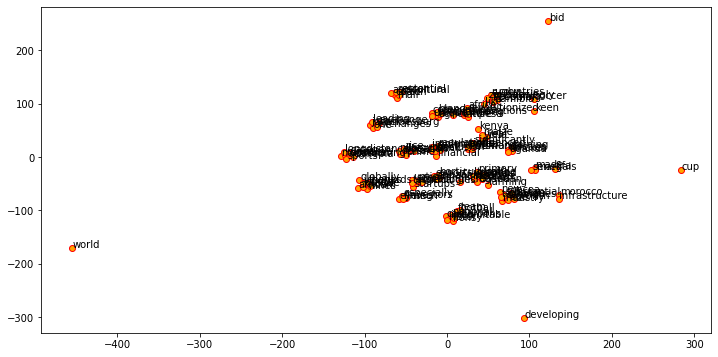

In [65]:
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0),
    textcoords='offset points')

In [66]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
kenya,0.561231,1.639635,2.029844,1.575998,-0.976132,-0.717271,1.949077,-0.181016,0.047426,1.898577,1.467426,0.530454,-0.275948,0.544185,-0.831209
farming,-0.174367,0.110400,0.471425,-1.858607,-1.270719,2.000992,0.289586,0.682565,0.626566,2.692659,-0.338978,0.600450,1.280935,0.468232,-1.354149
financial,-1.982795,-0.696186,2.332054,0.914670,-1.665265,-0.748790,2.387444,0.510440,1.258746,0.224496,-0.373364,-0.241373,0.336640,-0.401789,-0.701419
football,-0.599907,-0.598198,1.828045,0.393926,0.945743,-0.836179,0.956818,0.349481,-0.644804,2.286049,0.027624,1.631302,0.462132,-0.618069,0.292970
african,-2.664818,0.245410,0.720836,-1.416514,0.469644,-0.722265,-0.373836,1.113331,-1.489850,-0.067820,1.593321,1.510321,0.467839,-1.448800,0.464510
growth,-1.455088,0.118582,1.203023,-0.681053,-1.372198,0.426928,0.499600,-0.545330,0.889958,-1.609990,1.898579,1.705582,-0.583347,-2.411299,-1.024775
egypt,-1.701611,0.041544,2.126919,-0.663635,-1.096295,1.510980,-0.733691,-0.869595,1.285621,0.592550,0.160046,0.978664,1.375105,0.698507,1.391626
cup,0.117098,-1.506914,1.273515,0.237334,1.036157,0.011876,-0.449337,-1.166061,0.264145,1.631096,2.378946,1.403784,1.043565,-1.303885,0.745391
world,0.139035,-0.746017,2.036175,-0.756923,1.694397,0.438469,-0.475222,-0.725418,-0.003726,2.070664,2.401485,0.325184,0.009199,-0.849018,0.538207
fifa,-0.147396,-0.626625,1.743245,0.055830,1.953142,0.110812,-0.760711,-0.549049,-0.131664,1.110139,2.413607,1.675161,0.723214,0.109861,0.904174


### Word similarity dataframe

The first step is to importing necessary packages. This is how you need to import packages -

In [67]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)

similarity_df.head(10)

,kenya,farming,financial,football,african,growth,egypt,cup,world,fifa,...,infrastructure,bid,cotton,mali,essential,part,agricultural,sector,nile,maize
kenya,1.000000,0.198895,0.481067,0.482151,-0.050550,0.141203,0.089833,0.217462,0.272020,0.231694,...,0.166824,0.440876,0.285629,0.194649,0.269419,0.305182,0.297984,0.371519,0.326587,0.634779
farming,0.198895,1.000000,0.175875,0.239357,0.028617,0.025747,0.446392,0.098351,0.199800,0.032521,...,0.180601,0.136962,0.464581,0.452790,0.466008,0.496535,0.507270,0.489204,0.525161,0.101511
financial,0.481067,0.175875,1.000000,0.382851,0.113599,0.388303,0.323151,0.019873,-0.042202,-0.107205,...,0.108207,0.142011,0.435638,0.214136,0.350546,0.371989,0.291625,0.357817,0.353548,0.291457
football,0.482151,0.239357,0.382851,1.000000,0.426743,0.044682,0.228179,0.602738,0.576725,0.596906,...,0.425634,0.400231,0.292596,0.304152,0.053826,0.160813,0.212781,0.295991,0.450576,0.320843
african,-0.050550,0.028617,0.113599,0.426743,1.000000,0.493359,0.231115,0.354054,0.360231,0.442981,...,0.118985,0.034619,0.039523,0.166208,0.045709,-0.016091,0.213361,0.070236,-0.010416,0.491246
growth,0.141203,0.025747,0.388303,0.044682,0.493359,1.000000,0.275615,0.287191,0.180493,0.158735,...,0.096170,0.179796,0.026650,-0.064340,0.111426,0.053753,0.079945,0.002787,0.225173,0.554789
egypt,0.089833,0.446392,0.323151,0.228179,0.231115,0.275615,1.000000,0.354687,0.320377,0.396620,...,0.278479,0.166226,0.393346,0.376108,0.357723,0.437981,0.487747,0.349134,0.638814,0.186135
cup,0.217462,0.098351,0.019873,0.602738,0.354054,0.287191,0.354687,1.000000,0.859346,0.872869,...,0.722120,0.738453,0.185723,0.223380,0.043679,0.235153,0.207593,0.220996,0.455695,0.334081
world,0.272020,0.199800,-0.042202,0.576725,0.360231,0.180493,0.320377,0.859346,1.000000,0.862752,...,0.701402,0.718895,0.192126,0.308349,0.037676,0.234917,0.233086,0.266742,0.348224,0.283277
fifa,0.231694,0.032521,-0.107205,0.596906,0.442981,0.158735,0.396620,0.872869,0.862752,1.000000,...,0.724468,0.729731,0.248653,0.363956,0.136658,0.262908,0.295861,0.283607,0.407225,0.419816


In [68]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(- row.values) [1:4]], axis=1)

kenya              [maize, increased, year]
farming         [substantial, source, many]
financial            [nigeria, bank, trade]
football          [team, indomitable, rich]
african         [known, vineyards, fertile]
                           ...             
part            [sector, cotton, essential]
agricultural         [cotton, sector, part]
sector            [cotton, part, essential]
nile                [wheat, location, rice]
maize              [increased, year, yield]
Length: 128, dtype: object